In [1]:
import pandas as pd
from file_paths_and_consts import *
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import datetime
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
plt.style.use('classic')
import seaborn as sns
import geopandas as gpd
import random
sns.set()
import os
SEED_VALUE = 590
random.seed(SEED_VALUE)

OUTPUT_DIR

'/project/biocomplexity/UKR_forecast/migration_data/AAMAS_output_data/'

In [2]:
import multiprocessing as mp
import numpy as np
def calc_attitude_parallel(num):
    return num**2,num**3

def multiproc_attitude(all_nums):
    cpus = 4#mp.cpu_count()
    #st_time = time.time()
    hh_splits = np.array_split(all_nums, cpus) #--this a list with multiple dataframe.. each dataframe is used by one core
    #print(hh_splits)
    pool_args = [h_chunk for h_idx,h_chunk in enumerate(hh_splits)]
    #print('total time taken to split',time.time()-st_time)
    pool = mp.Pool(processes = cpus)
    results = pool.map(calc_attitude_parallel, pool_args)
    pool.close()
    pool.join()
    return results

ss = []

for i in range(0,100):
    ss.append(i)
    
results = multiproc_attitude(ss)
print(type(results[0][1]))

<class 'numpy.ndarray'>


In [3]:
ROLLING = 1

In [4]:
# refugee_data_2 = pd.read_csv('../ABM_model_Ukraine/ukr_refugee_src_2.csv')
# refugee_data_2['time'] = pd.to_datetime(refugee_data_2['time'])
# refugee_data_2 = refugee_data_2.sort_values(by='time')
# refugee_data_2['refugee'] = refugee_data_2['daily'].rolling(ROLLING).mean()
# refugee_data_2 = refugee_data_2.dropna(subset=['refugee'])
# # refugee_data['refugee'] = refugee_data['refugee'].diff()
# # refugee_data = refugee_data.dropna(subset=['refugee'])
# #refugee_data_2 = refugee_data_2[refugee_data_2.time>pd.to_datetime('2022-05-05')]
# #refugee_data_2.at[71, 'refugee'] = 49355.571429

# refugee_data_2

In [5]:
#normally use this

# ROLLING = 7
# refugee_data = pd.read_csv('../ABM_model_Ukraine/ukr_refugee_src_2.csv')
# refugee_data['time'] = pd.to_datetime(refugee_data['time'])
# refugee_data = refugee_data.sort_values(by='time')
# refugee_data['refugee'] = refugee_data['daily'].rolling(ROLLING).mean()
# refugee_data = refugee_data.dropna(subset=['refugee'])
# # refugee_data['refugee'] = refugee_data['refugee'].diff()
# # refugee_data = refugee_data.dropna(subset=['refugee'])
# #refugee_data_2 = refugee_data_2[refugee_data_2.time>pd.to_datetime('2022-05-05')]
# #refugee_data_2.at[71, 'refugee'] = 49355.571429

# refugee_data

In [6]:
# # create and evaluate a static autoregressive model
# import matplotlib.pyplot as plt
# from statsmodels.tsa.ar_model import AutoReg
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# X = refugee_data_2['refugee'].values
# train, test = X[1:len(X)-50], X[len(X)-50:]
# # train autoregression
# model = AutoReg(train, lags=2)
# model_fit = model.fit()
# print('Coefficients: %s' % model_fit.params)
# # make predictions
# predictions = model_fit.predict(start=0, end=len(train)+len(test)-1, dynamic=False)
# train_predictions = model_fit.predict(start=0, end=len(train)-1, dynamic=False)
# #another_predictions = model_fit.predict(X)
# print(len(predictions))
# print(train.shape,test.shape)
# # for i in range(len(predictions)):
# #     print('predicted=%f, expected=%f' % (predictions[i], test[i]))
# #rmse = sqrt(mean_squared_error(test, predictions))
# #print('Test RMSE: %.3f' % rmse)
# # plot results
# #plt.plot(test)
# plt.plot(predictions, color='red')
# plt.plot(train_predictions, color='blue')
# plt.plot(X,color='green')
# plt.show()

In [7]:
##normally remove this block
ROLLING = 1
refugee_data_2 = pd.read_csv(GROUND_TRUTH_DIR+'ukraine_refugee_data_2.csv')
refugee_data_2['time'] = pd.to_datetime(refugee_data_2['time'])
refugee_data_2 = refugee_data_2.sort_values(by='time')
refugee_data_2['refugee'] = refugee_data_2['refugee'].rolling(ROLLING).mean()
refugee_data_2 = refugee_data_2.dropna(subset=['refugee'])
# refugee_data['refugee'] = refugee_data['refugee'].diff()
# refugee_data = refugee_data.dropna(subset=['refugee'])
#refugee_data_2 = refugee_data_2[refugee_data_2.time>pd.to_datetime('2022-05-05')]
#refugee_data_2.at[71, 'refugee'] = 49355.571429

In [8]:
ROLLING = 1
conflict_data_file = UNCLEANED_DATA_DIR+'ukraine_conflict_data_feb_oct.csv'
refugee_data_file = GROUND_TRUTH_DIR+'ukraine_refugee_data_2.csv'
geo_shp_file = UNCLEANED_DATA_DIR+'UKR_shapefile_2/ukr_shp/ukr_admbnda_adm2_sspe_20230201.shp'

conflict_data = pd.read_csv(conflict_data_file)
conflict_data['time'] = pd.to_datetime(conflict_data['event_date'])
conflict_data = conflict_data.sort_values(by='time')
conflict_count = conflict_data[['time','fatalities']].groupby('time')['fatalities'].count().reset_index()
conflict_count['event_cnt'] = conflict_count['fatalities']

In [9]:
#OUTPUT_DIR = OUTPUT_DIR+'/../'
##normally remove this block, for pnas paper
ROLLING = 7
refugee_data = pd.read_csv(GROUND_TRUTH_DIR+'ukraine_refugee_data_2.csv')
refugee_data['time'] = pd.to_datetime(refugee_data['time'])
refugee_data = refugee_data.sort_values(by='time')
refugee_data['refugee'] = refugee_data['refugee'].rolling(ROLLING).mean()
refugee_data = refugee_data.dropna(subset=['refugee'])
# refugee_data['refugee'] = refugee_data['refugee'].diff()
# refugee_data = refugee_data.dropna(subset=['refugee'])
#refugee_data_2 = refugee_data_2[refugee_data_2.time>pd.to_datetime('2022-05-05')]
#refugee_data_2.at[71, 'refugee'] = 49355.571429


In [10]:
conflict_count

,time,fatalities,event_cnt
0,2022-02-01,27,27
1,2022-02-02,24,24
2,2022-02-03,8,8
3,2022-02-04,14,14
4,2022-02-05,16,16
...,...,...,...
223,2022-09-12,103,103
224,2022-09-13,106,106
225,2022-09-14,163,163
226,2022-09-15,157,157


In [11]:
conflict_sum = conflict_data[['time','fatalities']].groupby('time')['fatalities'].sum().reset_index()
conflict_sum['fatalities_tot'] = conflict_sum['fatalities']
conflict_sum

,time,fatalities,fatalities_tot
0,2022-02-01,0,0
1,2022-02-02,0,0
2,2022-02-03,0,0
3,2022-02-04,0,0
4,2022-02-05,0,0
...,...,...,...
223,2022-09-12,11,11
224,2022-09-13,8,8
225,2022-09-14,91,91
226,2022-09-15,141,141



lag 7
0.8099440338256475
0.4853460262264956
34957.18563215984
0.39618572529243423


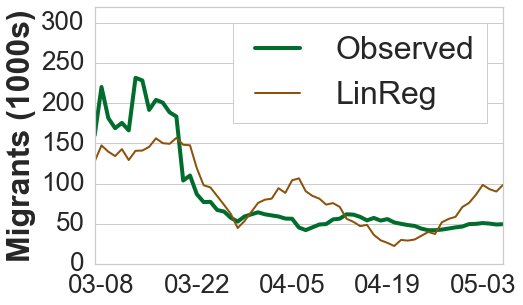

In [13]:
import datetime

trim = 7

import seaborn as sns
import datetime
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates

fig,ax = plt.subplots(figsize=(8,5))
#plt.xticks(rotation=30)
rcParams["font.family"] = "calibri"
rcParams["font.size"] = 32
rcParams["axes.labelsize"] = 28
rcParams["axes.titlesize"] = 28
rcParams["xtick.labelsize"] = 26
rcParams["ytick.labelsize"] = 26

sns.set_style('white')
ax.plot(refugee_data['time'], refugee_data['refugee']/1000,label='Observed',linewidth=4,color='#006d2c')

lr_colors = ['#8c510a','#9970ab','#b35806']

for idx,ll in enumerate([7]):
    LAG = ll
    cc = lr_colors[idx]
    TEST_SIZE = 0

    features = []

    conflict_feature = conflict_sum[['time','fatalities_tot']].merge(conflict_count[['time','event_cnt']],on='time',how='inner')

    for SHIFT in range(0,LAG):
        conflict_feature['f_'+str(SHIFT)] = conflict_feature['fatalities_tot'].shift(SHIFT)
        conflict_feature['e_'+str(SHIFT)] = conflict_feature['event_cnt'].shift(SHIFT)

        features.append('f_'+str(SHIFT))
        features.append('e_'+str(SHIFT))

    conflict_feature = conflict_feature.drop(columns=['fatalities_tot','event_cnt'])
    linreg_data_feature = conflict_feature.merge(refugee_data_2[['time','refugee']],on='time',how='inner')

    from sklearn.model_selection import train_test_split

    X = linreg_data_feature[features]
    Y = linreg_data_feature['refugee']

    train_size = X.shape[0]-TEST_SIZE

    X_train, X_test, Y_train, Y_test = X[0:train_size],X[train_size:],Y[0:train_size],Y[train_size:]

    from sklearn.linear_model import LinearRegression

    lm = LinearRegression() # Creating an Instance of LinearRegression model

    lm.fit(X_train,Y_train)

    prediction = lm.predict(X)
    linreg_data_feature['prediction'] = prediction

    ROLLING = 7
    linreg_data_feature['prediction'] = linreg_data_feature['prediction'].rolling(ROLLING).mean()
    linreg_data_feature['refugee'] = linreg_data_feature['refugee'].rolling(ROLLING).mean()
    linreg_data_feature = linreg_data_feature.dropna(subset=['refugee'])

    ax.plot(linreg_data_feature['time'], linreg_data_feature['prediction']/1000,label='LinReg',linewidth=2,color=cc)

    print('\nlag',LAG)
    pcc = linreg_data_feature['prediction'].corr(refugee_data['refugee'])
    print(pcc)
    rmspe = ((((linreg_data_feature['prediction'] - refugee_data['refugee'])/refugee_data['refugee'])**2).sum()/refugee_data.shape[0])**0.5
    print(rmspe)
    rmse = ((((linreg_data_feature['prediction'] - refugee_data['refugee'])/1)**2).sum()/refugee_data.shape[0])**0.5
    print(rmse)
    mape = (abs((linreg_data_feature['prediction']-refugee_data['refugee'])/refugee_data['refugee'])).sum()/refugee_data.shape[0]
    print(mape)
    
gradient = np.linspace(0, 1, 256)
colors = plt.cm.get_cmap("terrain")(gradient)
#ax.fill_between(first_df["time"], q1/1000, q3/1000, alpha=0.3, color=colors)

myFmt = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(myFmt)

#ax.set_facecolor("white")
sns.set_style('whitegrid')
# Add labels and legend
#ax.set_xlabel("Time",fontweight='bold')
ax.set_ylabel("Migrants (1000s)",fontweight='bold',fontsize=32)

#ax.set_title("Daily Migrants from Ukraine generated by ABM model")
ax.legend(fontsize=32)
#ax.set_yscale('log')
ax.set_xlim([datetime.date(2022, 3, 7), datetime.date(2022, 5, 6)])
ax.set_ylim([0, 320])
ax.yaxis.grid(True)
ax.xaxis.grid(False)
fig.tight_layout()
#fig.savefig('../Figures/lin_reg_compare_pnas.png',dpi=350,bbox_inches='tight')

In [16]:
linreg_data_feature[['time','prediction']].to_csv('../analysis_notebooks/linreg_compare.csv',index=False)

In [14]:
refugee_data.shape

(60, 2)

In [15]:
linreg_data_feature.shape

(60, 17)

In [12]:

linreg_data_feature

,time,f_0,e_0,f_1,e_1,f_2,e_2,f_3,e_3,f_4,e_4,f_5,e_5,f_6,e_6,refugee
0,2022-02-24,81,72,4.0,50.0,8.0,127.0,5.0,131.0,2.0,147.0,2.0,128.0,0.0,107.0,79209.0
1,2022-02-25,37,75,81.0,72.0,4.0,50.0,8.0,127.0,5.0,131.0,2.0,147.0,2.0,128.0,100316.0
2,2022-02-26,113,81,37.0,75.0,81.0,72.0,4.0,50.0,8.0,127.0,5.0,131.0,2.0,147.0,143235.0
3,2022-02-27,73,53,113.0,81.0,37.0,75.0,81.0,72.0,4.0,50.0,8.0,127.0,5.0,131.0,167673.0
4,2022-02-28,133,90,73.0,53.0,113.0,81.0,37.0,75.0,81.0,72.0,4.0,50.0,8.0,127.0,162012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2022-05-25,16,80,47.0,77.0,10.0,65.0,52.0,96.0,9.0,80.0,49.0,74.0,150.0,114.0,48379.0
91,2022-05-26,98,70,16.0,80.0,47.0,77.0,10.0,65.0,52.0,96.0,9.0,80.0,49.0,74.0,48247.0
92,2022-05-27,48,89,98.0,70.0,16.0,80.0,47.0,77.0,10.0,65.0,52.0,96.0,9.0,80.0,36797.0
93,2022-05-28,92,87,48.0,89.0,98.0,70.0,16.0,80.0,47.0,77.0,10.0,65.0,52.0,96.0,34755.0


In [98]:
print(type(X_train),type(X_test),type(X))
print(type(Y_train),type(Y_test),type(Y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [99]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() # Creating an Instance of LinearRegression model

lm.fit(X_train,Y_train)

LinearRegression()

In [100]:
print(lm.coef_)

[ 63.5578047  365.88817585  38.24252392 385.98709845  25.64391114
 288.40256414  29.36980951  80.2077817   20.3031739  163.6127266
  12.75757116 333.81669419 -11.06102126 516.23847401]


In [101]:
prediction = lm.predict(X)
linreg_data_feature['prediction'] = prediction
linreg_data_feature

,time,f_0,e_0,f_1,e_1,f_2,e_2,f_3,e_3,f_4,e_4,f_5,e_5,f_6,e_6,refugee,prediction
0,2022-02-24,81,72,4.0,50.0,8.0,127.0,5.0,131.0,2.0,147.0,2.0,128.0,0.0,107.0,79209.0,112587.019868
1,2022-02-25,37,75,81.0,72.0,4.0,50.0,8.0,127.0,5.0,131.0,2.0,147.0,2.0,128.0,100316.0,114386.745712
2,2022-02-26,113,81,37.0,75.0,81.0,72.0,4.0,50.0,8.0,127.0,5.0,131.0,2.0,147.0,143235.0,126825.912536
3,2022-02-27,73,53,113.0,81.0,37.0,75.0,81.0,72.0,4.0,50.0,8.0,127.0,5.0,131.0,167673.0,100754.622609
4,2022-02-28,133,90,73.0,53.0,113.0,81.0,37.0,75.0,81.0,72.0,4.0,50.0,8.0,127.0,162012.0,85706.089721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2022-05-25,16,80,47.0,77.0,10.0,65.0,52.0,96.0,9.0,80.0,49.0,74.0,150.0,114.0,48379.0,77900.475711
91,2022-05-26,98,70,16.0,80.0,47.0,77.0,10.0,65.0,52.0,96.0,9.0,80.0,49.0,74.0,48247.0,65566.520851
92,2022-05-27,48,89,98.0,70.0,16.0,80.0,47.0,77.0,10.0,65.0,52.0,96.0,9.0,80.0,36797.0,74240.731246
93,2022-05-28,92,87,48.0,89.0,98.0,70.0,16.0,80.0,47.0,77.0,10.0,65.0,52.0,96.0,34755.0,79890.687613


In [102]:
# import matplotlib.pyplot as plt

# fig,ax = plt.subplots(figsize=(6,6))

# ax.scatter(Y,prediction)

In [103]:
ROLLING = 7
linreg_data_feature['prediction'] = linreg_data_feature['prediction'].rolling(ROLLING).mean()
linreg_data_feature['refugee'] = linreg_data_feature['refugee'].rolling(ROLLING).mean()
linreg_data_feature = linreg_data_feature.dropna(subset=['refugee'])

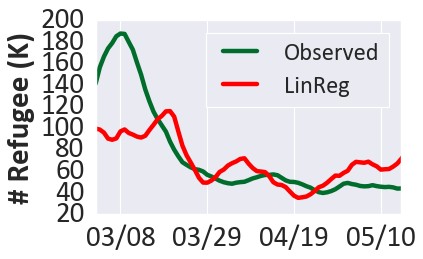

In [104]:
import datetime

trim = 7

import seaborn as sns
import datetime
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates

rcParams["font.family"] = "calibri"
rcParams["font.size"] = 32
rcParams["axes.labelsize"] = 28
rcParams["axes.titlesize"] = 28
rcParams["xtick.labelsize"] = 26
rcParams["ytick.labelsize"] = 26

fig,ax = plt.subplots(figsize=(6,4))

ax.plot(linreg_data_feature['time'], linreg_data_feature['refugee']/1000,label='Observed',linewidth=4,color='#006d2c')
ax.plot(linreg_data_feature['time'], linreg_data_feature['prediction']/1000,label='LinReg',linewidth=4,color='red')
# #ax.plot(first_df['time'][0:SHIFT],median_normal.shift(SHIFT)[0:SHIFT]/1000,linewidth=2,color='#6a51a3',alpha=1,label='ABM-Agency',marker='x')
# #ax.fill_between(first_df["time"][0:SHIFT], q1_normal.shift(SHIFT)[0:SHIFT]/1000, q3_normal.shift(SHIFT)[0:SHIFT]/1000, color='#9e9ac8',alpha=0.8)
# ax.plot(first_df_state['time'],median_normal_state/1000,linewidth=2,color='#252525',alpha=1,label='ABM-SoA')
# ax.fill_between(first_df_state['time'], q1_normal_state/1000, q3_normal_state/1000, color='#525252',alpha=0.8)
# #ax.plot(first_df['time'],median_normal/1000,linewidth=2,color='red',alpha=0.1,label='ABM')
# #ax.fill_between(first_df["time"], q1_normal/1000, q3_normal/1000, color='red',alpha=0.1)

myFmt = mdates.DateFormatter('%m/%d')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=3))
ax.xaxis.set_major_formatter(myFmt)
#ax.annotate('RMSPE = 0.77', xy=(19100, 200),fontsize=20,fontweight='bold')
#ax.annotate('PCC = 0.94', xy=(19100, 150),fontsize=20,fontweight='bold')
#ax.set_facecolor("white")
#sns.set_style('whitegrid')

ax.legend(loc='best',ncol=1,fontsize=22)
ax.set_ylabel("# Refugee (K)",fontweight='bold')
ax.set_xlim([datetime.date(2022, 3, 2), datetime.date(2022, 5, 15)])
#ax.set_ylim([0,300])
ax.grid(axis='y')
#print(ax.get_xticks())
fig.tight_layout()
#fig.savefig('../Figures/aamas_sofa_result.png',dpi=350,bbox_inches='tight')
#5110 porjonto bhalo